<a href="https://colab.research.google.com/github/maxkleiner/maXbox4/blob/master/objectdetector3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detector with ImageAI
![objectdetect](https://maxbox4.files.wordpress.com/2020/07/wseenewimage23.png)

In [17]:
# !pip install ImageAI
#!pip3 uninstall keras
#!pip3 install --upgrade keras
#!pip show tensorflow
# !pip show keras
#!pip install tensorflow==1.2
# !pip install --force-reinstall tensorflow==1.15.3
# !pip install --upgrade tensorflow
#!pip3 install tensorflow-gpu==1.13.1
# !pip3 install keras==2.1.6


In [18]:
# ImageAI is a Python library built to empower Computer Vision
from imageai.Detection import ObjectDetection
from imageai.Detection.Custom import DetectionModelTrainer
#Using TensorFlow backend.
from PIL import Image
from IPython.display import Image
import tensorflow.keras.backend as K
#import keras.backend.tensorflow_backend as K
!pip show tensorflow
#!pip show keras

Name: tensorflow
Version: 1.15.3
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: keras-applications, gast, absl-py, astor, termcolor, six, opt-einsum, protobuf, grpcio, keras-preprocessing, tensorflow-estimator, numpy, tensorboard, wheel, google-pasta, wrapt
Required-by: fancyimpute


First we need a library with modules. ImageAI is a Python library built to empower developers to build applications and systems with self-contained deep learning and Computer Vision capabilities using a few lines of straight forward code. 
As the next thing we create an instance of the class ObjectDetection, as shown from module above:

In [19]:
# K.get_session
detector = ObjectDetection()
print(detector)

Now we Download the pre-trained YOLOv3 model (a tiny one is also available-setModelTypeAsTinyYOLOv3()):

 !wget https://github.com/OlafenwaMoses/ImageAI/releases/download/essential-v4/pretrained-yolov3.h5

The model is already downloaded before on /content.

In [20]:
 # !wget https://github.com/OlafenwaMoses/ImageAI/releases/download/essential-v4/pretrained-yolov3.h5

In [21]:
!ls
#!cd sample_data/

 pretrained-yolov3.h5   teaching.jpg.2	'teaching.jpg?w=768'
 sample_data	        teaching.jpg.3	 teaching_out4.jpg
 teaching.jpg	        teaching.jpg.4	 wsee.jpg
 teaching.jpg.1         teaching.jpg.5


We need an image to detect the objects we want, we do that with wget and store the image in the directory /sample_data:

In [22]:
#!wget –P /sample_data https://maxbox4.files.wordpress.com/2020/07/teaching.jpg?w=768
#!wget –P /sample_data https://maxbox4.files.wordpress.com/2020/07/teaching.jpg
# !wget https://maxbox4.files.wordpress.com/2020/07/wsee.jpg
!pwd
!cd sample_data
!ls -l

/content
total 244876
-rw-r--r-- 1 root root 248671664 Jul 30  2019  pretrained-yolov3.h5
drwxr-xr-x 1 root root      4096 Jul 30 16:30  sample_data
-rw-r--r-- 1 root root    268035 Jul 31 08:35  teaching.jpg
-rw-r--r-- 1 root root    268035 Jul 31 08:35  teaching.jpg.1
-rw-r--r-- 1 root root    268035 Jul 31 08:35  teaching.jpg.2
-rw-r--r-- 1 root root    268035 Jul 31 08:35  teaching.jpg.3
-rw-r--r-- 1 root root    268035 Jul 31 08:35  teaching.jpg.4
-rw-r--r-- 1 root root    268035 Jul 31 08:35  teaching.jpg.5
-rw-r--r-- 1 root root     55528 Jul 31 08:35 'teaching.jpg?w=768'
-rw-r--r-- 1 root root    350934 Aug  4 11:58  teaching_out4.jpg
-rw-r--r-- 1 root root     42134 Jul 31 08:40  wsee.jpg


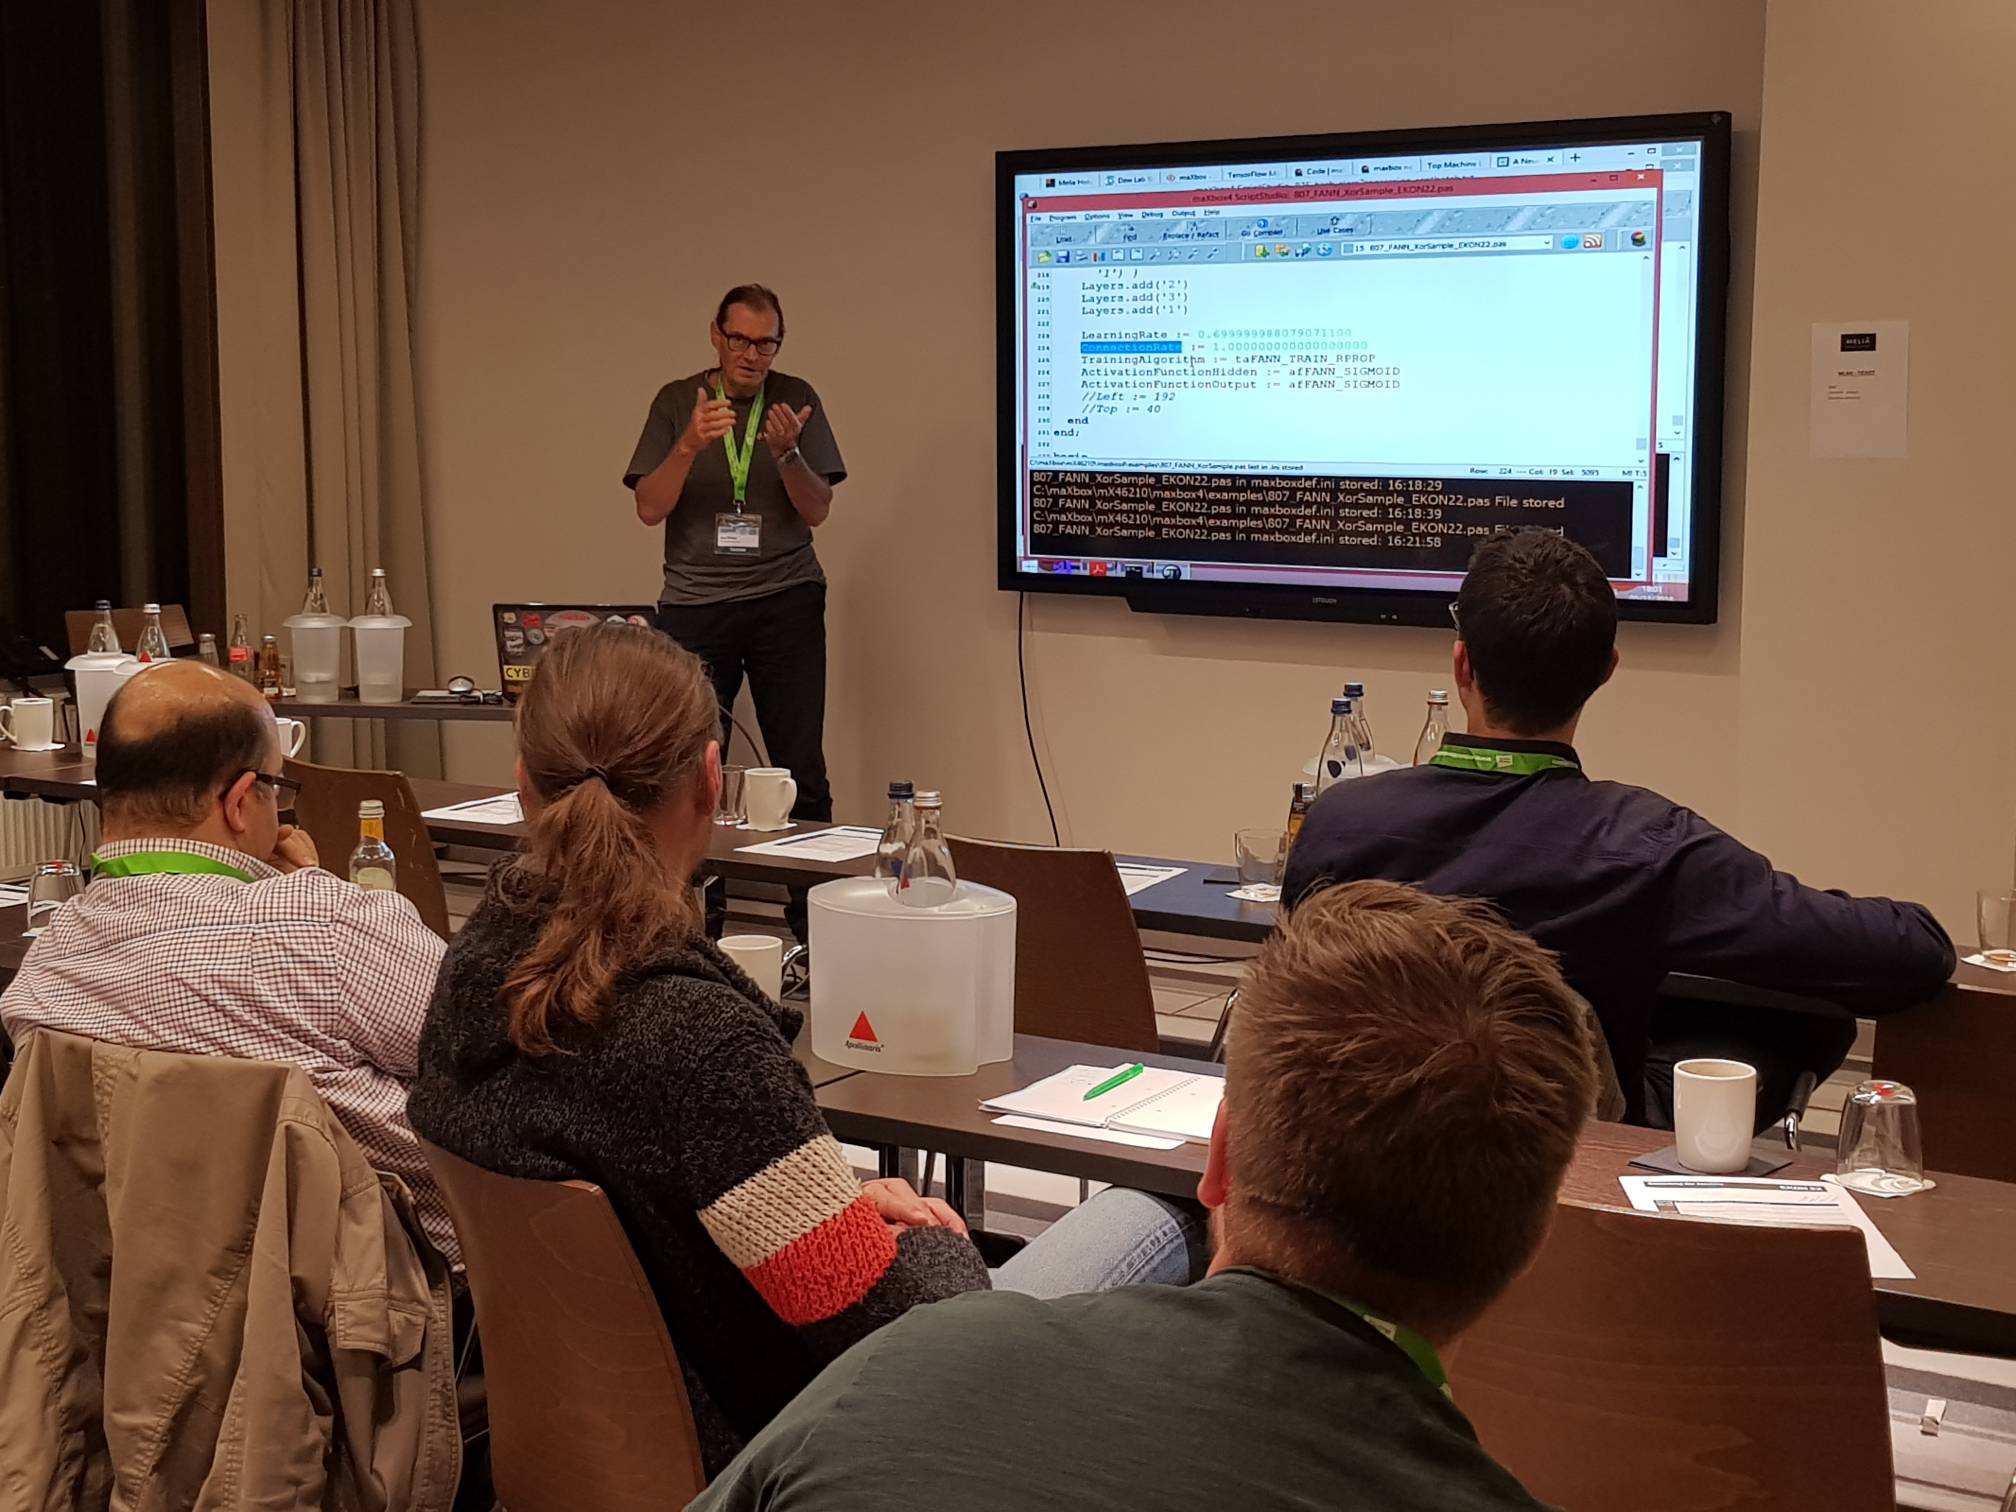

In [23]:
# we define our structure and show the image:
model_path = "./pretrained-yolov3.h5"
#input_path = "./sample_data/teaching.jpg"
input_path = "./teaching.jpg"
output_path = "./teaching_out4.jpg"
Image(input_path)

In [24]:
#using the pre-trained TinyYOLOv3 model or the full YOLOv3 model , 
detector.setModelTypeAsYOLOv3()
detector.setModelPath(model_path)

#loads model from path specified above using the setModelPath() class method.
detector.loadModel()

In this tutorial, as I mentioned we’ll be using the pre-trained TinyYOLOv3 model, so I use the setModelTypeAsYOLOv3() function to load our model:
To detect only some of the objects above, I will need to call the CustomObjects method and set the name of the object(s) we want to detect to through. The rest are False by default. In our example, we detect customized only person, laptop and bottle. The boat is to test some negative test (maybe it find some message in the bottle with a boat in it ;-)).

In [25]:
#detection=detector.detectObjectsFromImage(input_image=input_path,output_image_path=output_path,minimum_percentage_probability=30)

custom= detector.CustomObjects(person=True,laptop=True,handbag=True,bottle=True,chair=True, cup=True)
#custom= detector.CustomObjects(clock=True)
detections = detector.detectCustomObjectsFromImage(custom_objects=custom, \
                  input_image=input_path, output_image_path=output_path,\
                                          minimum_percentage_probability=10)
                                            
for eachItem in detections:
    print(eachItem["name"] , " : ", eachItem["percentage_probability"] , "----->", eachItem["box_points"])

print('image detector results compute ends...')

laptop  :  10.274481028318405 -----> [940, 836, 1269, 1055]
laptop  :  11.922695487737656 -----> [1128, 852, 1290, 948]
chair  :  21.290838718414307 -----> [1655, 983, 1857, 1116]
chair  :  23.645000159740448 -----> [922, 835, 1193, 1043]
chair  :  37.28722333908081 -----> [428, 1119, 710, 1510]
chair  :  49.522724747657776 -----> [275, 759, 455, 883]
chair  :  61.91036105155945 -----> [4, 1016, 502, 1500]
cup  :  12.664569914340973 -----> [77, 605, 119, 657]
cup  :  16.016478836536407 -----> [1985, 881, 2012, 964]
cup  :  58.01719427108765 -----> [1833, 1074, 1927, 1189]
cup  :  77.39415764808655 -----> [733, 771, 789, 832]
cup  :  98.27015399932861 -----> [1670, 1060, 1758, 1170]
bottle  :  11.337028443813324 -----> [355, 557, 406, 711]
bottle  :  11.720912158489227 -----> [1322, 689, 1371, 775]
bottle  :  13.318772614002228 -----> [142, 608, 188, 663]
bottle  :  14.416247606277466 -----> [890, 783, 933, 861]
bottle  :  16.347795724868774 -----> [199, 632, 225, 671]
bottle  :  22.579

With the parameter minimum_percentage_probability=10 it could find a lot of bottles, and yes we got an output!:

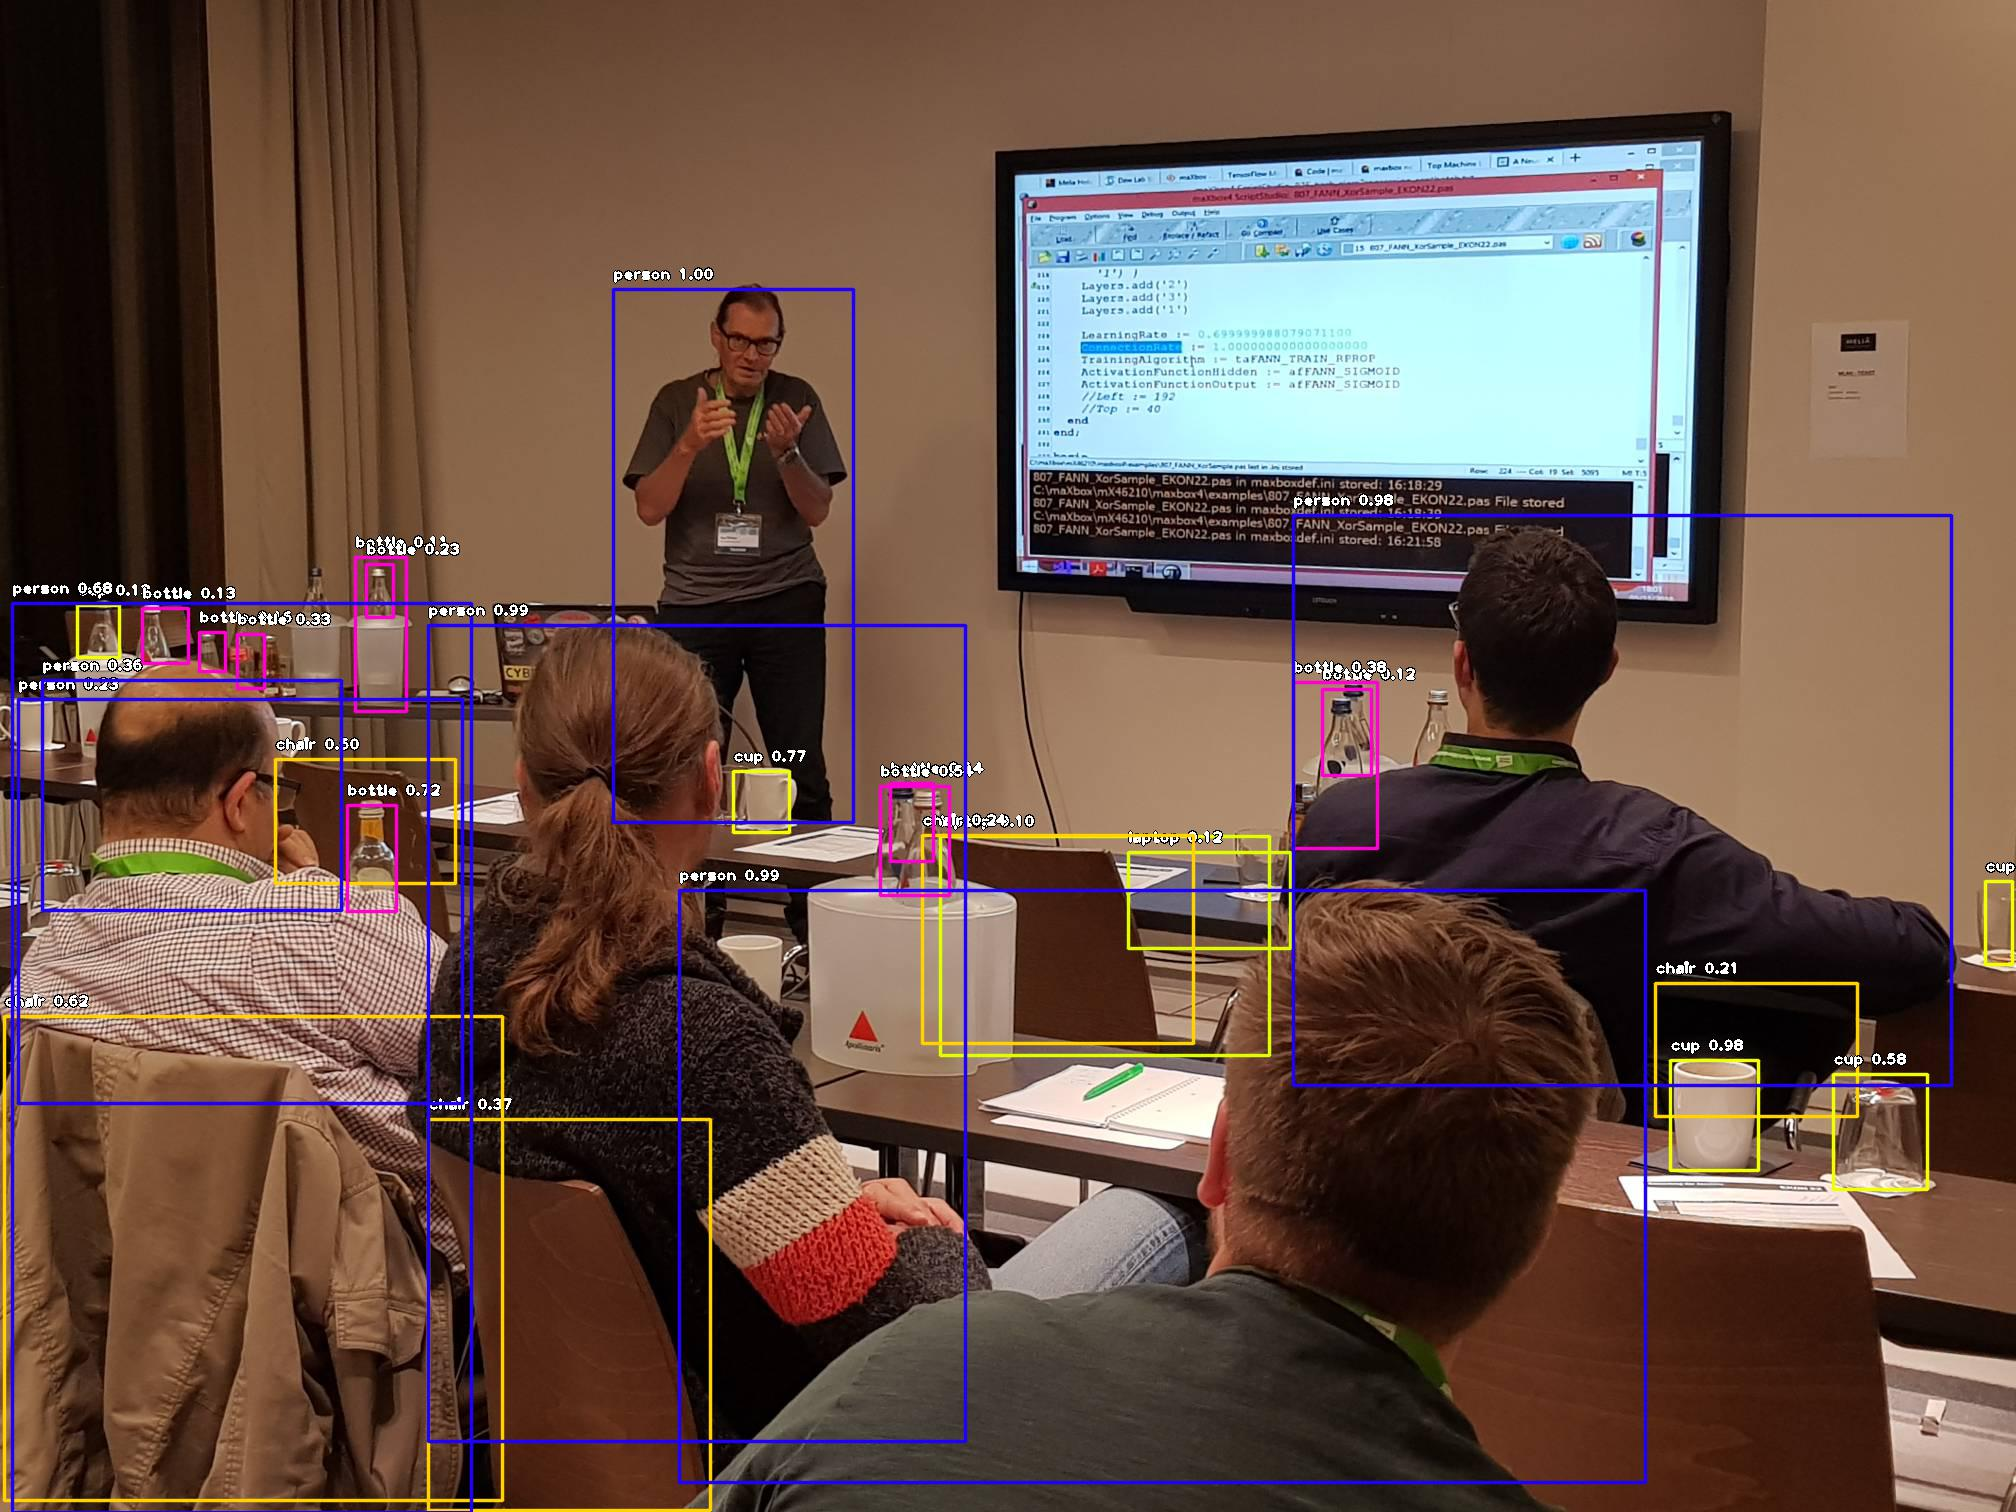

In [26]:
Image(output_path)

So we get a lof of objects with color frames and corresponding probability. The bottles by lila color and astonishing a green frame is the laptop. Funny but really effective!
As you can see he or she found all 5 persons with probability above 67 percent!

This is the function (detectCustomObjectsFromImage) that performs object detection task after the model as loaded. It can be called many times to detect objects in any number of images. 

https://maxbox4.wordpress.com/2020/07/31/object-detection/

There are 80 possible objects that you can detect with the ObjectDetection class, and they are as seen below (not ordered).

person, bicycle, car, motorcycle, airplane, 
bus, train, truck, boat, traffic light, fire hydrant, stop_sign,

parking meter, bench, bird, cat, dog, horse, sheep, cow, elephant, bear, zebra, giraffe, backpack, umbrella, handbag, tie, suitcase, frisbee, skis, snowboard, sports ball, kite, baseball bat, baseball glove, skateboard, surfboard, tennis racket, bottle, wine glass, cup, fork, knife, spoon, bowl, banana, apple, sandwich, orange, broccoli, carrot, hot dog, pizza, donot, cake, chair, couch, potted plant, bed, dining table, toilet, tv, laptop, mouse, remote, keyboard, cell phone, microwave, oven, toaster, sink, refrigerator, book, clock, vase, scissors, teddy bear, hair dryer, toothbrush.

https://imageai.readthedocs.io/en/latest/detection/index.html
